In [1]:
# Documentation https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 
%matplotlib inline

# Variáves de Entrada
restless = ctrl.Antecedent(np.arange(0,11,1), 'agitado')
alert = ctrl.Antecedent(np.arange(0, 11, 1), 'alerta')
posture = ctrl.Antecedent(np.arange(0, 11, 1), 'postura')
voiceVolume = ctrl.Antecedent(np.arange(0, 11, 1), 'volume da voz')

mood = ctrl.Consequent(np.arange(0,26,1), 'humor')


# Criação automática das variáveis fuzzy de Entrada
restless.automf(3)
alert.automf(3)
posture.automf(3)
voiceVolume.automf(3)


# Criação da variável Fuzzy de Saida
mood['triste'] = fuzz.trimf(mood.universe, [0,0,10])
mood['normal'] = fuzz.trimf(mood.universe, [0,13,25])
mood['feliz'] = fuzz.trimf(mood.universe, [15,25,25])


In [2]:
#Regras para cada humor 
regra1 = ctrl.Rule(restless["poor"] & alert["poor"] & posture["poor"] & voiceVolume["poor"], mood["triste"])
regra2 = ctrl.Rule(restless["average"] & alert["average"] & posture["poor"] & voiceVolume["poor"], mood["triste"])
regra3 = ctrl.Rule(restless["good"] & alert["good"] & posture["poor"] & voiceVolume["poor"], mood["triste"])
regra4 = ctrl.Rule(restless["good"] & alert["average"] & posture["poor"] & voiceVolume["poor"], mood["triste"])
regra5 = ctrl.Rule(restless["average"] & alert["good"] & posture["poor"] & voiceVolume["poor"], mood["triste"])

regra6 = ctrl.Rule(restless["good"] & alert["poor"] & posture["good"] & voiceVolume["good"], mood["feliz"])
regra7 = ctrl.Rule(restless["good"] & alert["average"] & posture["good"] & voiceVolume["good"], mood["feliz"])
regra8 = ctrl.Rule(restless["good"] & alert["good"] & posture["good"] & voiceVolume["good"], mood["feliz"])
regra9 = ctrl.Rule(restless["good"] & alert["poor"] & posture["good"] & voiceVolume["poor"], mood["feliz"])
regra10 = ctrl.Rule(restless["good"] & alert["average"] & posture["good"] & voiceVolume["average"], mood["feliz"])
regra11 = ctrl.Rule(restless["good"] & alert["good"] & posture["good"] & voiceVolume["average"], mood["feliz"])
regra12 = ctrl.Rule(restless["good"] & alert["average"] & posture["good"] & voiceVolume["good"], mood["feliz"])

regra13 = ctrl.Rule(restless["average"] & alert["average"] & posture["poor"] & voiceVolume["good"], mood["normal"])
regra14 = ctrl.Rule(restless["poor"] & alert["average"] & posture["poor"] & voiceVolume["good"], mood["normal"])
regra15 = ctrl.Rule(restless["average"] & alert["average"] & posture["good"] & voiceVolume["poor"], mood["normal"])
regra16 = ctrl.Rule(restless["good"] & alert["average"] & posture["poor"] & voiceVolume["good"], mood["normal"])
regra17 = ctrl.Rule(restless["poor"] & alert["average"] & posture["good"] & voiceVolume["poor"], mood["normal"])



In [9]:
#Aplicando as regras para humor
mood_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8,regra9,regra10,regra11,regra12,regra13,regra14,regra15,regra16,regra17])
humor = ctrl.ControlSystemSimulation(mood_ctrl)

# Grau de pertinência de cada comportamento
humor.input['agitado'] = 8.5
humor.input['alerta'] = 6.4
humor.input['postura'] = 10.0
humor.input['volume da voz'] = 5.5

# Calculando a humor
humor.compute()


21.43589743589743


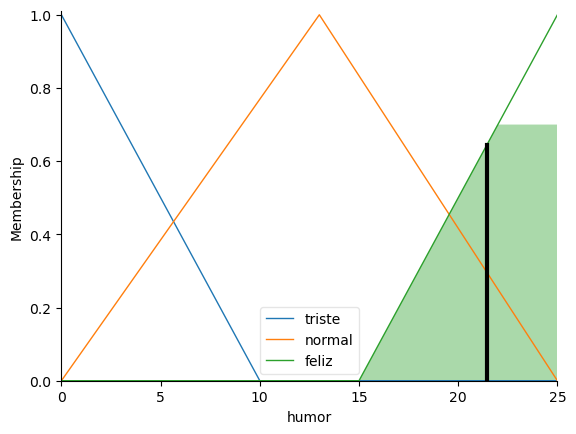

In [10]:
# Saída com gráfico
print (humor.output['humor'])
mood.view(sim= humor)